## Purpose of script:
#### basic tutorial for ARMA (Autoregressive Moving Average) Model

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [6]:
df = pd.read_csv('../Datasets/ice_cream.csv',
                 parse_dates=[0], index_col=0, date_parser=parser).squeeze("columns")

df.rename('production', inplace=True)

df = df.asfreq(pd.infer_freq(df.index))

print(len(df))
df.head(2)

577


DATE
1972-01-01    59.9622
1972-02-01    67.0605
Freq: MS, Name: production, dtype: float64

In [7]:
start_date = datetime(2010,1,1)

df = df[start_date:]
print(len(df))

121


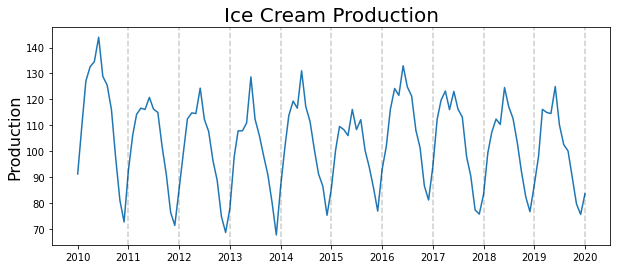

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

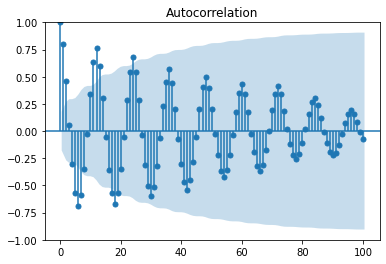

In [10]:
acf_plot = plot_acf(df, lags=100)

## PACF

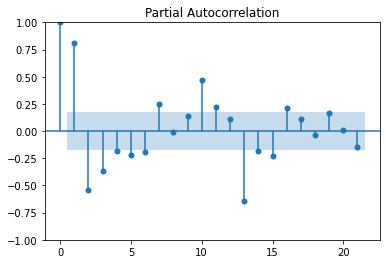

In [13]:
pacf_plot = plot_pacf(df, method='yw')
## based on PACF, lags of 1,2,3 is a start

## Train and Test

In [14]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

## Model Fit

In [20]:
model = ARIMA(train_data, order=(3,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Tue, 14 Feb 2023   AIC                            758.170
Time:                        18:41:24   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [21]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [22]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

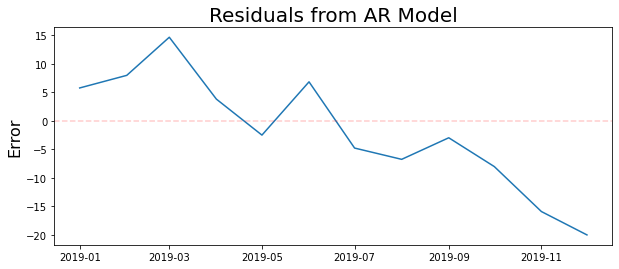

In [23]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)